In [ ]:
# Scientific database
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


import requests
import json

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

I choose Choose "RG postcodes" as my task_1 data and use "RG" as data name.

In [ ]:
url = "https://www.doogal.co.uk/UKPostcodesCSV.ashx?Search=RG"

RG = pd.read_csv(url)

# <font size="5" color = 'red'>**Task 1:**</font>

## 1.1 Perform and EDA on the data

###  1.1.1 perform dataset:

First, I use some function to perform the RG dataset.

First 5 rows:

In [ ]:
RG.head()

,Postcode,In Use?,Latitude,Longitude,Easting,Northing,Grid Ref,County,District,Ward,District Code,Ward Code,Country,County Code,Constituency,Introduced,Terminated,Parish,National Park,Population,Households,Built up area,Built up sub-division,Lower layer super output area,Rural/urban,Region,Altitude,London zone,LSOA Code,Local authority,MSOA Code,Middle layer super output area,Parish Code,Census output area,Constituency Code,Index of Multiple Deprivation,Quality,User Type,Last updated,Nearest station,Distance to station,Postcode area,Postcode district,Police force,Water company,Plus Code,Average Income,Sewage Company,Travel To Work Area,ITL level 2,ITL level 3
0,RG1 1AA,No,51.460725,-0.974799,471321.0,174026.0,SU713740,Berkshire,Reading,Abbey,E06000038,E05002319,England,E11000002,Reading East,1990-07-01,2009-10-01,"Reading, unparished area",NaN,NaN,NaN,Reading,Reading,Reading 011F,Urban city and town,South East,38.0,NaN,E01033415,NaN,E02003399,Reading Central,E43000031,E00082605,E14000889,11038,1,1,2021-11-12,Reading,0.295638,RG,RG1,Thames Valley,Thames Water,9C3XF26G+73,54400.0,NaN,Reading,"Berkshire, Buckinghamshire and Oxfordshire",Berkshire
1,RG1 1AF,Yes,51.457494,-0.969301,471708.0,173672.0,SU717736,Berkshire,Reading,Abbey,E06000038,E05002319,England,E11000002,Reading East,1999-12-01,NaN,"Reading, unparished area",NaN,NaN,NaN,Reading,Reading,Reading 011F,Urban city and town,South East,49.0,NaN,E01033415,NaN,E02003399,Reading Central,E43000031,E00174487,E14000889,11038,1,0,2021-11-12,Reading,0.228222,RG,RG1,Thames Valley,Thames Water,9C3XF24J+X7,54400.0,NaN,Reading,"Berkshire, Buckinghamshire and Oxfordshire",Berkshire
2,RG1 1AG,No,51.455961,-0.970890,471600.0,173500.0,SU716734,Berkshire,Reading,Abbey,E06000038,E05002319,England,E11000002,Reading East,1983-01-01,1992-12-01,"Reading, unparished area",NaN,NaN,NaN,Reading,Reading,Reading 011F,Urban city and town,South East,48.0,NaN,E01033415,NaN,E02003399,Reading Central,E43000031,E00174487,E14000889,11038,8,1,2021-11-12,Reading,0.321069,RG,RG1,Thames Valley,NaN,9C3XF24H+9J,54400.0,NaN,Reading,"Berkshire, Buckinghamshire and Oxfordshire",Berkshire
3,RG1 1AH,No,51.456919,-0.973402,471424.0,173604.0,SU714736,Berkshire,Reading,Abbey,E06000038,E05002319,England,E11000002,Reading East,1984-02-01,2003-11-01,"Reading, unparished area",NaN,NaN,NaN,Reading,Reading,Reading 011F,Urban city and town,South East,51.0,NaN,E01033415,NaN,E02003399,Reading Central,E43000031,E00174486,E14000889,11038,1,1,2021-11-12,Reading,0.232624,RG,RG1,Thames Valley,Thames Water,9C3XF24G+QJ,54400.0,NaN,Reading,"Berkshire, Buckinghamshire and Oxfordshire",Berkshire
4,RG1 1AJ,No,51.458406,-0.969741,471676.0,173773.0,SU716737,Berkshire,Reading,Abbey,E06000038,E05002319,England,E11000002,Reading East,2006-05-01,2017-07-01,"Reading, unparished area",NaN,NaN,NaN,Reading,Reading,Reading 011F,Urban city and town,South East,46.0,NaN,E01033415,NaN,E02003399,Reading Central,E43000031,E00174487,E14000889,11038,1,0,2021-11-12,Reading,0.152888,RG,RG1,Thames Valley,NaN,9C3XF25J+94,54400.0,NaN,Reading,"Berkshire, Buckinghamshire and Oxfordshire",Berkshire


In [ ]:
RG.describe()

,Latitude,Longitude,Easting,Northing,National Park,Population,Households,Altitude,London zone,Index of Multiple Deprivation,Quality,User Type,Distance to station,Average Income
count,45945.000000,45945.000000,45855.000000,45855.000000,0.0,19317.000000,19317.000000,45855.000000,0.0,45945.000000,45945.000000,45945.000000,45855.000000,45855.000000
mean,51.303897,-1.025121,467764.554640,167750.642002,NaN,40.297096,16.276233,77.297590,NaN,22648.455871,1.999108,0.316683,2.315415,57739.679424
std,2.274175,0.194037,13115.768136,8460.422686,NaN,39.685634,15.149404,30.502206,NaN,7981.548769,2.295857,0.465188,2.104589,8261.405150
min,0.000000,-1.594805,428203.000000,140893.000000,NaN,1.000000,0.000000,28.000000,NaN,0.000000,1.000000,0.000000,0.002985,39100.000000
25%,51.374212,-1.129361,460728.000000,164438.500000,NaN,11.000000,5.000000,53.000000,NaN,15838.000000,1.000000,0.000000,0.839177,52300.000000
50%,51.415598,-0.988553,470291.000000,169124.000000,NaN,28.000000,12.000000,73.000000,NaN,24384.000000,1.000000,0.000000,1.743970,56500.000000
75%,51.455259,-0.891884,477049.500000,173407.000000,NaN,57.000000,23.000000,95.000000,NaN,29722.000000,1.000000,1.000000,2.984670,62800.000000
max,51.636511,0.000000,490519.000000,193613.000000,NaN,891.000000,98.000000,254.000000,NaN,32841.000000,9.000000,1.000000,14.443500,86100.000000


Using the info() function to see the data store in columns and we can see the following results show that many variables are missing values in the data. 

In [ ]:
RG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45945 entries, 0 to 45944
Data columns (total 51 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Postcode                        45945 non-null  object 
 1   In Use?                         45945 non-null  object 
 2   Latitude                        45945 non-null  float64
 3   Longitude                       45945 non-null  float64
 4   Easting                         45855 non-null  float64
 5   Northing                        45855 non-null  float64
 6   Grid Ref                        45855 non-null  object 
 7   County                          45855 non-null  object 
 8   District                        45855 non-null  object 
 9   Ward                            45855 non-null  object 
 10  District Code                   45855 non-null  object 
 11  Ward Code                       45855 non-null  object 
 12  Country                         

Dataset shape:

In [ ]:
RG.shape

(45945, 51)

### 1.1.2  EDA on the dataset.

Second, I do EDA on the "RG" dataset.
As we learned in the previous step that the data contains missing values, we first need to analyse the missing values before proceeding to the next step.

In [ ]:
RG.isnull()

,Postcode,In Use?,Latitude,Longitude,Easting,Northing,Grid Ref,County,District,Ward,District Code,Ward Code,Country,County Code,Constituency,Introduced,Terminated,Parish,National Park,Population,Households,Built up area,Built up sub-division,Lower layer super output area,Rural/urban,Region,Altitude,London zone,LSOA Code,Local authority,MSOA Code,Middle layer super output area,Parish Code,Census output area,Constituency Code,Index of Multiple Deprivation,Quality,User Type,Last updated,Nearest station,Distance to station,Postcode area,Postcode district,Police force,Water company,Plus Code,Average Income,Sewage Company,Travel To Work Area,ITL level 2,ITL level 3
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45940,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False
45941,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False
45942,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False
45943,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False


In this step, we can see the number of missing values contained in each attribute. As the number of missing values for some of the attributes was too large, we chose to remove the attribute in order to avoid any impact on the overall analysis.

In [ ]:
RG.isna().sum().head()

Postcode      0
In Use?       0
Latitude      0
Longitude     0
Easting      90
dtype: int64

In this step, the dataset is properly processed to remove missing values.  
Also, select only the data that is still in use and remove the data that is no longer in use or unused.

In [ ]:
# 'Population','Households',

In [ ]:
##  create a copy of "RG" dataset, and do the remove operation in RG_Select
RG_Select = RG.copy()

##  Select the data which is in use.
RG_Select = RG_Select.loc[RG_Select.loc[np.where(RG_Select['In Use?']=='Yes')].index,:]

##  Remove columns which have too much NaN
drop_name = ['Terminated','National Park','Built up sub-division','London zone','Local authority','Sewage Company','Water company','Built up area']

##  Drop rows which have Nan
RG_Select.drop(drop_name,axis=1,inplace=True)
RG_Select.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

##  reset the index of dataset
RG_Select = RG_Select.reset_index()

##  See the final dataset
RG_Select.head()

,index,Postcode,In Use?,Latitude,Longitude,Easting,Northing,Grid Ref,County,District,Ward,District Code,Ward Code,Country,County Code,Constituency,Introduced,Parish,Population,Households,Lower layer super output area,Rural/urban,Region,Altitude,LSOA Code,MSOA Code,Middle layer super output area,Parish Code,Census output area,Constituency Code,Index of Multiple Deprivation,Quality,User Type,Last updated,Nearest station,Distance to station,Postcode area,Postcode district,Police force,Plus Code,Average Income,Travel To Work Area,ITL level 2,ITL level 3
0,8,RG1 1AR,Yes,51.457149,-0.968770,471745.0,173634.0,SU717736,Berkshire,Reading,Abbey,E06000038,E05002319,England,E11000002,Reading East,1990-02-01,"Reading, unparished area",7.0,6.0,Reading 011F,Urban city and town,South East,50.0,E01033415,E02003399,Reading Central,E43000031,E00174487,E14000889,11038,1,0,2021-11-12,Reading,0.280998,RG,RG1,Thames Valley,9C3XF24J+VF,54400.0,Reading,"Berkshire, Buckinghamshire and Oxfordshire",Berkshire
1,35,RG1 1DB,Yes,51.456874,-0.971266,471572.0,173601.0,SU715736,Berkshire,Reading,Abbey,E06000038,E05002319,England,E11000002,Reading East,1980-01-01,"Reading, unparished area",7.0,4.0,Reading 011F,Urban city and town,South East,50.0,E01033415,E02003399,Reading Central,E43000031,E00174484,E14000889,11038,1,0,2021-11-12,Reading,0.216452,RG,RG1,Thames Valley,9C3XF24H+PF,54400.0,Reading,"Berkshire, Buckinghamshire and Oxfordshire",Berkshire
2,39,RG1 1DG,Yes,51.457112,-0.970893,471598.0,173628.0,SU715736,Berkshire,Reading,Abbey,E06000038,E05002319,England,E11000002,Reading East,2003-11-01,"Reading, unparished area",1.0,1.0,Reading 011F,Urban city and town,South East,50.0,E01033415,E02003399,Reading Central,E43000031,E00174484,E14000889,11038,1,0,2021-11-12,Reading,0.197778,RG,RG1,Thames Valley,9C3XF24H+RJ,54400.0,Reading,"Berkshire, Buckinghamshire and Oxfordshire",Berkshire
3,44,RG1 1DP,Yes,51.456907,-0.973100,471445.0,173603.0,SU714736,Berkshire,Reading,Abbey,E06000038,E05002319,England,E11000002,Reading East,1980-01-01,"Reading, unparished area",1.0,1.0,Reading 011F,Urban city and town,South East,51.0,E01033415,E02003399,Reading Central,E43000031,E00174486,E14000889,11038,1,0,2021-11-12,Reading,0.225148,RG,RG1,Thames Valley,9C3XF24G+QQ,54400.0,Reading,"Berkshire, Buckinghamshire and Oxfordshire",Berkshire
4,51,RG1 1DX,Yes,51.456933,-0.974035,471380.0,173605.0,SU713736,Berkshire,Reading,Abbey,E06000038,E05002319,England,E11000002,Reading East,1980-01-01,"Reading, unparished area",3.0,2.0,Reading 011F,Urban city and town,South East,50.0,E01033415,E02003399,Reading Central,E43000031,E00174486,E14000889,11038,1,0,2021-11-12,Reading,0.254251,RG,RG1,Thames Valley,9C3XF24G+Q9,54400.0,Reading,"Berkshire, Buckinghamshire and Oxfordshire",Berkshire


Next, I will analyse data by considering two variables/columns in a data set.

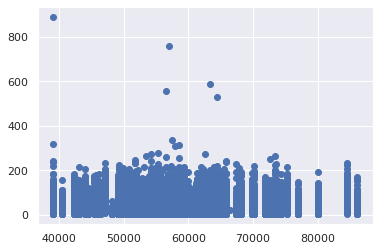

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


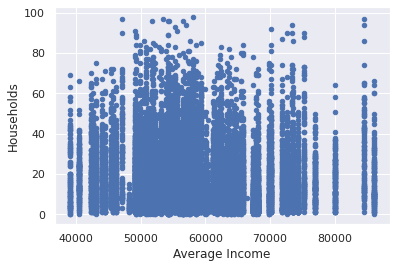

In [ ]:
#plot the scatter plot of average Income and Population variable in data
plt.scatter(RG_Select["Average Income"],RG_Select.Population)
plt.show()

#plot the scatter plot of average Income and age Households in data
RG_Select.plot.scatter(x="Average Income",y="Households")
plt.show()

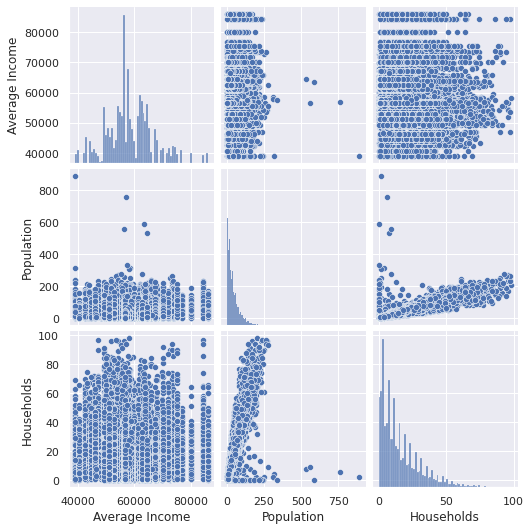

In [ ]:
#plot the pair plot of Average Income, Population and Households in data dataframe.
sns.pairplot(data = RG_Select, vars=['Average Income','Population','Households'])
plt.show()

Since I cannot use more than two variables as the x and y axes in a scatter plot, it is difficult to see the relationship between three numerical variables in a single plot. In these cases, I will use a correlation matrix.

I create a matrix using Average Income, Population, Households. Afterward, I used the seaborn library of the matrix to draw a heat map.

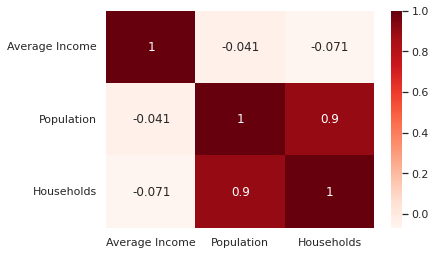

In [ ]:
# Creating a matrix using age, salry, balance as rows and columns
RG_Select[['Average Income','Population','Households']].corr()

#plot the correlation matrix of salary, balance and age in data dataframe.
sns.heatmap(RG_Select[['Average Income','Population','Households']].corr(), annot=True, cmap = 'Reds')
plt.show()

## 1.2 perform the API request to Google Maps to extract the data requested by the user. 

In [ ]:
RG_Select.head()


,index,Postcode,In Use?,Latitude,Longitude,Easting,Northing,Grid Ref,County,District,Ward,District Code,Ward Code,Country,County Code,Constituency,Introduced,Parish,Population,Households,Lower layer super output area,Rural/urban,Region,Altitude,LSOA Code,MSOA Code,Middle layer super output area,Parish Code,Census output area,Constituency Code,Index of Multiple Deprivation,Quality,User Type,Last updated,Nearest station,Distance to station,Postcode area,Postcode district,Police force,Plus Code,Average Income,Travel To Work Area,ITL level 2,ITL level 3
0,8,RG1 1AR,Yes,51.457149,-0.968770,471745.0,173634.0,SU717736,Berkshire,Reading,Abbey,E06000038,E05002319,England,E11000002,Reading East,1990-02-01,"Reading, unparished area",7.0,6.0,Reading 011F,Urban city and town,South East,50.0,E01033415,E02003399,Reading Central,E43000031,E00174487,E14000889,11038,1,0,2021-11-12,Reading,0.280998,RG,RG1,Thames Valley,9C3XF24J+VF,54400.0,Reading,"Berkshire, Buckinghamshire and Oxfordshire",Berkshire
1,35,RG1 1DB,Yes,51.456874,-0.971266,471572.0,173601.0,SU715736,Berkshire,Reading,Abbey,E06000038,E05002319,England,E11000002,Reading East,1980-01-01,"Reading, unparished area",7.0,4.0,Reading 011F,Urban city and town,South East,50.0,E01033415,E02003399,Reading Central,E43000031,E00174484,E14000889,11038,1,0,2021-11-12,Reading,0.216452,RG,RG1,Thames Valley,9C3XF24H+PF,54400.0,Reading,"Berkshire, Buckinghamshire and Oxfordshire",Berkshire
2,39,RG1 1DG,Yes,51.457112,-0.970893,471598.0,173628.0,SU715736,Berkshire,Reading,Abbey,E06000038,E05002319,England,E11000002,Reading East,2003-11-01,"Reading, unparished area",1.0,1.0,Reading 011F,Urban city and town,South East,50.0,E01033415,E02003399,Reading Central,E43000031,E00174484,E14000889,11038,1,0,2021-11-12,Reading,0.197778,RG,RG1,Thames Valley,9C3XF24H+RJ,54400.0,Reading,"Berkshire, Buckinghamshire and Oxfordshire",Berkshire
3,44,RG1 1DP,Yes,51.456907,-0.973100,471445.0,173603.0,SU714736,Berkshire,Reading,Abbey,E06000038,E05002319,England,E11000002,Reading East,1980-01-01,"Reading, unparished area",1.0,1.0,Reading 011F,Urban city and town,South East,51.0,E01033415,E02003399,Reading Central,E43000031,E00174486,E14000889,11038,1,0,2021-11-12,Reading,0.225148,RG,RG1,Thames Valley,9C3XF24G+QQ,54400.0,Reading,"Berkshire, Buckinghamshire and Oxfordshire",Berkshire
4,51,RG1 1DX,Yes,51.456933,-0.974035,471380.0,173605.0,SU713736,Berkshire,Reading,Abbey,E06000038,E05002319,England,E11000002,Reading East,1980-01-01,"Reading, unparished area",3.0,2.0,Reading 011F,Urban city and town,South East,50.0,E01033415,E02003399,Reading Central,E43000031,E00174486,E14000889,11038,1,0,2021-11-12,Reading,0.254251,RG,RG1,Thames Valley,9C3XF24G+Q9,54400.0,Reading,"Berkshire, Buckinghamshire and Oxfordshire",Berkshire


Create a list that contains the zip code which we want to calculate the time.

In [ ]:
##  test for list. control the number of zip according to "1:4"
select_zip_list = RG_Select.iloc[1:6,:]['Postcode'].tolist()
select_zip_list

['RG1 1DB', 'RG1 1DG', 'RG1 1DP', 'RG1 1DX', 'RG1 1EG']

Then we write a function which we input the zip code, the function will return the time of three modes.

In [ ]:
##  "origin" is str

##  input origin zip code
##  return time of 'driving', 'transit', 'walking'(list type)
##  example ['10 mins', '24 mins', '38 mins']

def get_time(origin):
  api_key = ''

  travel_mode = ['driving', 'transit', 'walking']

  url ='https://maps.googleapis.com/maps/api/distancematrix/json?'

  orig = origin 

  dest = 'RG66AH'

  temp = []

  temp.append(origin)

  for x in travel_mode:
    
    mode = x
    
    deptime = 'now'


    req = requests.get(url + 'origins=' + orig +

                    '&destinations=' + dest +

                    '&mode=' + mode +

                    '&departure_time=' + deptime +

                    '&key=' + api_key)

    temp1 = req.json()['rows'][0]['elements'][0]['distance']['text']  + ' , ' + req.json()['rows'][0]['elements'][0]['duration']['text']

    temp.append(temp1)
  
  return temp
    

In [ ]:
##  test function

get_time('RG6 6BZ')

['RG6 6BZ', '3.6 km , 8 mins', '3.2 km , 27 mins', '2.7 km , 31 mins']

In [ ]:
##  test return value of "get_time" function.
#req.json()['rows'][0]['elements'][0]['duration']['text']

Then we create another function which we can input the list of zip code we want to calculate.

In [ ]:
##  input zip code list
##  output "zip code + time of 3 modes"
##  eg: return： ['RG1 1DB', '10 mins', '38 mins', '38 mins']


def get_list_time(zip_list):

  time_of_zip = []

  for zip in zip_list:
    time_of_zip.append(get_time(zip))

  return time_of_zip


## 1.3 Solution

I select a sample of postcodes and perform the API request to
Google Maps to extract the data requested by the user. 

In [ ]:
##  time of 5 zip code

time_of_zip=get_list_time(select_zip_list)
time_of_zip

[['RG1 1DB', '4.2 km , 10 mins', '3.3 km , 13 mins', '3.0 km , 38 mins'],
 ['RG1 1DG', '4.2 km , 10 mins', '3.3 km , 13 mins', '3.1 km , 38 mins'],
 ['RG1 1DP', '4.2 km , 10 mins', '3.8 km , 14 mins', '3.2 km , 39 mins'],
 ['RG1 1DX', '4.2 km , 10 mins', '3.8 km , 14 mins', '3.2 km , 40 mins'],
 ['RG1 1EG', '5.8 km , 14 mins', '3.6 km , 22 mins', '3.3 km , 41 mins']]

## 1.4 conclusions

Information requested from the third party solution (like google map) can be extracted. We can get the actual time from a third party, and then we can re-manipulate the data and use the data according to customer requirements.

# <font size="5" color = 'red'>**Task 2:**</font>

Our data extraction strategy is to select the postcodes that are still in use and extract the feature values that can be used in them.

## 2.1 Data extraction and cleaning

In order to extract to apply an unsupervised machine learning algorithm to the dataset, we need to choose some useful attributes and remove the NaN data.

In this step, we select  their postcode and 9 feature values.

In [ ]:
RG_task2 = RG.loc[:,['Postcode', 'In Use?', 'Population', 'Households', 'Altitude', 'Index of Multiple Deprivation', 'Quality', 'User Type', 'Distance to station', 'Average Income']]

then, remove the unuseful feature values.

In [ ]:
##  Select the data which is in use.
RG_task2 = RG_task2.loc[RG_task2.loc[np.where(RG_task2['In Use?']=='Yes')].index,:]


##  Drop rows which have Nan
RG_task2.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

##  reset the index of dataset
RG_task2 = RG_task2.reset_index()


##  Remove unused feature values like "index" and "'In Use?"
RG_task2 = RG_task2.drop('index', axis= 1)
RG_task2 = RG_task2.drop('In Use?', axis= 1)



In [ ]:
##  test whether dataset has NaN value
RG_task2.isna().sum()

Postcode                         0
Population                       0
Households                       0
Altitude                         0
Index of Multiple Deprivation    0
Quality                          0
User Type                        0
Distance to station              0
Average Income                   0
dtype: int64

In [ ]:
RG_task2.head()

,Postcode,Population,Households,Altitude,Index of Multiple Deprivation,Quality,User Type,Distance to station,Average Income
0,RG1 1AR,7.0,6.0,50.0,11038,1,0,0.280998,54400.0
1,RG1 1DB,7.0,4.0,50.0,11038,1,0,0.216452,54400.0
2,RG1 1DG,1.0,1.0,50.0,11038,1,0,0.197778,54400.0
3,RG1 1DP,1.0,1.0,51.0,11038,1,0,0.225148,54400.0
4,RG1 1DX,3.0,2.0,50.0,11038,1,0,0.254251,54400.0


## 2.2 Data visualisation：


we spend some time visualising the raw dataset of numerical features; population and income.

Text(0.5, 1.0, 'Visualization of raw data')

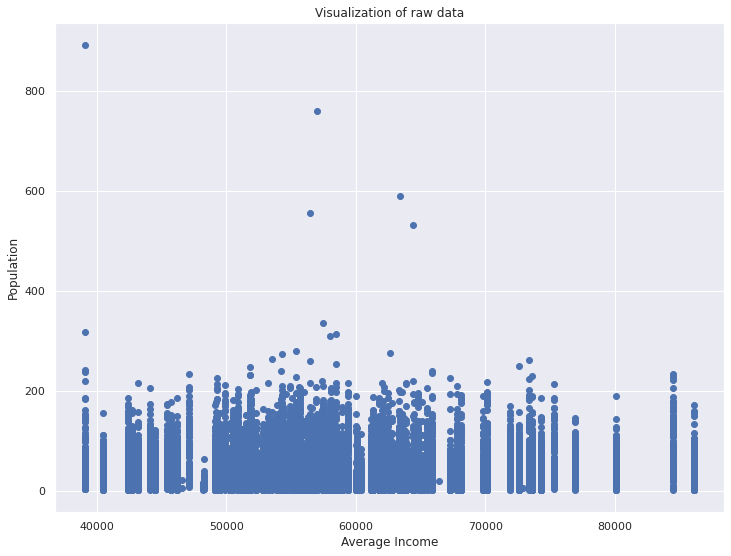

In [ ]:
plt.figure(figsize=(12,9))
plt.scatter(RG_task2.iloc[:,7], RG_task2.iloc[:,0])
plt.xlabel('Average Income')
plt.ylabel('Population')
plt.title('Visualization of raw data')

The graph represents all the points in our current dataset that our K-means algorithm will segment against.
The other observation in the graph relates to two variables, the domain of Average Income and Population. We know that the domain of Average Income is approximately 40,000 to 86,000, while the domain of Income ranges from around 0 to over 900. This indicates a significant difference between the ranges of these values. We must therefore include an essential step in our analysis. We must first standardise our data.


## 2.3 Data pre-processing

In [ ]:
##  Copy a new dataframe used to add name in the scatter later.
RG_task2_postcode = RG_task2.copy()

##  drop the column of "Postcode"
RG_task2.drop('Postcode',axis = 1, inplace = True)

We will quantify these similarities and differences.   
We want to treat all features equally. We can achieve this by converting features in such a way that their values fall within the same range of values. The differences between their values will therefore be comparable. So we will normalise the data.

In [ ]:
scaler = StandardScaler()
RG_task2_std = scaler.fit_transform(RG_task2)

Once the data has been normalised, we can proceed to the next step, which is dimensionality reduction.

We will use PCA to reduce the number of features in the dataset.
First, we must fit our normalised data using PCA.

In [ ]:
pca = PCA()
pca.fit(RG_task2_std)

PCA()

Secondly, we need to decide how many features we want to keep based on the cumulative variance plot.

In [ ]:
pca.explained_variance_ratio_

array([0.26432462, 0.19822076, 0.17385234, 0.12584111, 0.12496264,
       0.05962199, 0.04144378, 0.01173275])

Text(0, 0.5, 'Cumulative Explained Variance')

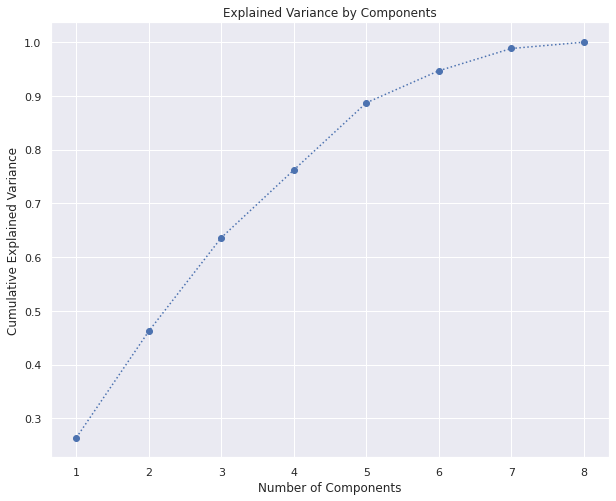

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,9),pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = 'dotted')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

This graph shows the amount of variance (on the y-axis) captured based on the number of components we included (on the x-axis). The rule of thumb is to retain approximately 80% of the variance.    
But for us, we wanted to bring the whole down to 2 dimensions so that it would be easier for us to print it out.

We perform PCA with a selected number of components.

In [ ]:
# I choose 2 components. 
pca = PCA(n_components = 2)

In [ ]:
# Fit the model the our data with the selected number of components.
pca.fit(RG_task2_std)

PCA(n_components=2)

We only need to calculate the resulting component scores for the elements in the dataset.

In [ ]:
pca.transform(RG_task2_std)

array([[ 0.20620958,  0.90107027],
       [ 0.138398  ,  0.89356626],
       [-0.0658143 ,  0.89293274],
       ...,
       [-1.23808914,  0.69134305],
       [-2.3391924 ,  0.90348441],
       [-0.7348066 , -0.29861362]])

We will add the newly obtained PCA scores to the K-means algorithm. This is how we perform the segmentation based on the principal component scores rather than the original features.

In [ ]:
scores_pca = pca.transform(RG_task2_std)

## 2.4 Combining PCA and K-means clustering

In [ ]:
# I fit K means using the transformed data from the PCA.
wcss = []
for i in range(1,21):
  kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state=38)
  kmeans_pca.fit(scores_pca)
  wcss.append(kmeans_pca.inertia_)

The next step involves drawing the WCSS based on the number of components on the graph.

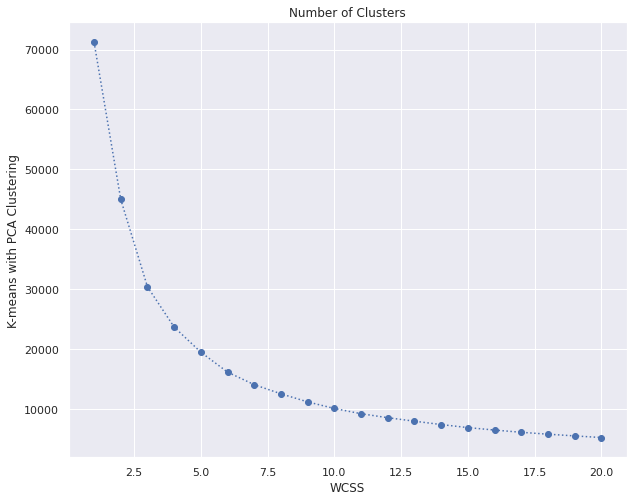

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,21), wcss, marker = 'o', linestyle = 'dotted')
plt.title('Number of Clusters')
plt.xlabel('WCSS')
plt.ylabel('K-means with PCA Clustering')
plt.show()

We determine the number of clusters we want to keep from this chart. To do this, we use the Elbow method. This method involves looking for kinks or elbows in the WCSS graph. Usually, the graph part before the elbow drops sharply, while the elbow region is much smoother after the elbow. In this case, the kink appears at the 4 cluster markers. Therefore, we will keep a four-cluster solution.

All that remains to be done is to implement it.

In [ ]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state=42)

In [ ]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

Here, we use the same initialisation procedure and random states as before. Subsequently, we fit the model with the principal component scores.

After this, the results of my algorithm are analysed.

## 2.5 Analysis of the results of PCA and K-Means clustering.

First, we will create a new data box. This allows us to add the values of individual components to our split dataset. The scores for the components are stored in the 'scores_pca' variable. In addition, we also attach the 'Segent K-means PCA' tag to the new dataframe.

In [ ]:
# I create a new data frame with the original features and add the PCA scores and assigned clusters.
RG_pca_kmeans = pd.concat([RG_task2.reset_index(drop=True), pd.DataFrame(scores_pca)], axis = 1)
RG_pca_kmeans.columns.values[-2:] = ['Component 1','Component 2']

# The Last column we add contains the pca k-means clustering Labels.
RG_pca_kmeans['Segent K-means PCA'] = kmeans_pca.labels_

In [ ]:
RG_pca_kmeans.head()

,Population,Households,Altitude,Index of Multiple Deprivation,Quality,User Type,Distance to station,Average Income,Component 1,Component 2,Segent K-means PCA
0,7.0,6.0,50.0,11038,1,0,0.280998,54400.0,0.206210,0.901070,3
1,7.0,4.0,50.0,11038,1,0,0.216452,54400.0,0.138398,0.893566,3
2,1.0,1.0,50.0,11038,1,0,0.197778,54400.0,-0.065814,0.892933,3
3,1.0,1.0,51.0,11038,1,0,0.225148,54400.0,-0.080739,0.906271,3
4,3.0,2.0,50.0,11038,1,0,0.254251,54400.0,-0.006559,0.898701,3


## 2.6 Visualization clusters

First, I extracted the coordinates of "Component 1" and "Component 2" from the dataframe.

In [ ]:
##  get component 1 and 2 from dataframe
points = []

for x in range(0,len(RG_pca_kmeans)):
  points.append([RG_pca_kmeans['Component 1'][x],RG_pca_kmeans['Component 2'][x]])

Secondly, I get the coordinates of the central node of the cluster.

In [ ]:
centers = kmeans_pca.cluster_centers_

Thirdly, I use the "vq" function to find the nearest node to the central node of the cluster.

In [ ]:
from scipy.cluster.vq import vq

# centroids: N-dimensional array with your centroids
# points:    N-dimensional array with your data points

closest, distances = vq(centers, points)

In [ ]:
## get the index of nearest nodes.
closest

array([14855,  8558,  1978,  1772], dtype=int32)

Let me go through and visualise our cluster on a 2D plane. I need to select two components and use them as axes.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


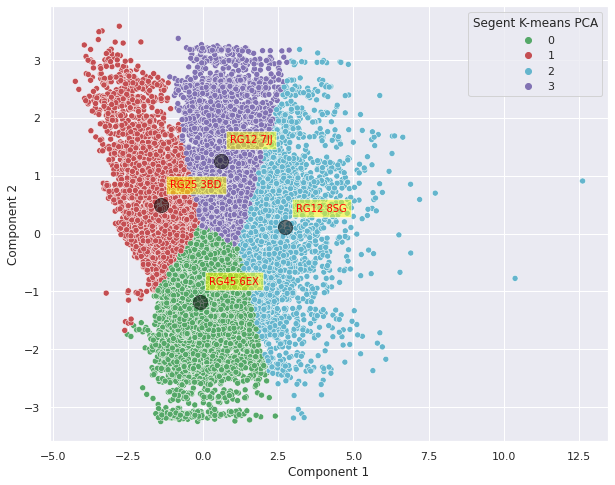

In [ ]:
## plot data by PCA components. The X axis is the first component, Y axis is the second component.
x_axis = RG_pca_kmeans['Component 1']
y_axis = RG_pca_kmeans['Component 2']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue = RG_pca_kmeans['Segent K-means PCA'], palette = ['g', 'r', 'c', 'm'])


##  plot the center nodes of each cluster.
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5)



##  plot the nearest nodes in each cluster.
##  To improve the aesthetics of the chart, an indent of 0.3 has been added to the x and y coordinates so that the text and background boxes do not overlap with the data points.
for x in closest:
  plt.text(RG_pca_kmeans['Component 1'][x]+0.3, RG_pca_kmeans['Component 2'][x]+0.3, 
            RG_task2_postcode['Postcode'][x], 
            color = 'red',fontdict=dict(color='red',size=10), 
            bbox=dict(facecolor='yellow',alpha=0.5))





##  store the pic named "Scenario2_Task2"
plt.savefig('Scenario2_Task2')
plt.show()

## 2.7 Conclusion

We used k-means clustering and divided the postcodes being used, based on our PCA, into 4 clusters overall and extracted the centroids of each cluster.

# <font size="5" color = 'red'>**Task 3:**</font>

Create a workflow that controls the API requests to Google Maps of the
representative points postcodes I have stablished. 

In [ ]:
##  input: list of time to each zip code. eg: ['RG45 6EX',  '19.7 km , 19 mins',  '21.1 km , 55 mins',  '15.9 km , 3 hours 16 mins']
##  input: name of csv file, string type. eg: 'time'
##  output: csv file.


import csv

def workflow(time_of_zip, csv_file_name):


  # Get the postcode of representative points.
  representative_points_list = []
  for x in closest:
    representative_points_list.append(RG_task2_postcode['Postcode'][x])
  

  # Based on the list of representative points, get the distance and time from the location in the list, to the school.
  time_of_representative_points = get_list_time(representative_points_list)



  # field names in csv file
  fields = ['Postcode', 'Car travel time to whiteknights', 
            'Public transport time to whiteknights', 
            'Walking to whiteknights'] 

  # data rows of csv file
  rows = time_of_zip
  # Replicate the data of the representative points to the remaining postcodes
  rows1 = time_of_representative_points

  # write the results into a csv file.
  with open(csv_file_name + '.csv', 'w', newline='') as f:
    
    # using csv.writer method from CSV package
    write = csv.writer(f)
    
    write.writerow(fields)
    write.writerows(rows)
    write.writerows(rows1)

In [ ]:
##  From the RG list, select the number of postcodes we want to get.

##  you can change the number by RG_Select.iloc[a:b,:], which a:b can change to the number you want
##  To save money, I choose 200 postcode.
select_zip_list = RG_Select.iloc[1:200,:]['Postcode'].tolist()

In [ ]:
## run the workflow
workflow(get_list_time(select_zip_list), 'time')

## 3.1 Conclusion

We can get the data from Third Parties and can operate the data for our customers as customers needed.